# Problem 1

In [122]:
using RandomNumbers
using LinearAlgebra
using Plots
using Distributions

## Problem 1.1

In [123]:
e = Diagonal([11381, 9619, 9340])

3×3 Diagonal{Int64,Array{Int64,1}}:
 11381     ⋅     ⋅
     ⋅  9619     ⋅
     ⋅     ⋅  9340

Based on homework 1, the fault is a strike-slip fault

In [124]:
alpha = 90
beta = 0
gamma = 90;

In [125]:
function geographical_stress_tensor_function(alpha,beta,gamma,principal_stress_tensor)
    
    rotation_matrix = [cosd(alpha)*cosd(beta) sind(alpha)*cosd(beta) -sind(beta);
    (cosd(alpha)*sind(beta)*sind(gamma) - sind(alpha)*cosd(gamma)) (sind(alpha)*sind(beta)*sind(gamma) + cosd(alpha)*cosd(gamma)) (cosd(beta)*sind(gamma)); 
    (cosd(alpha)*sind(beta)*cosd(gamma) + sind(alpha)*sind(gamma)) (sind(alpha)*sind(beta)*cosd(gamma) - cosd(alpha)*sind(gamma)) (cosd(beta)*cosd(gamma))]
    
    
    geographical_stress_tensor = transpose(rotation_matrix)* principal_stress_tensor*rotation_matrix
    return geographical_stress_tensor
end
    

geographical_stress_tensor_function (generic function with 1 method)

## Answer 

In [126]:
geographical_stress_tensor = geographical_stress_tensor_function(alpha,beta,gamma,e)

3×3 Array{Float64,2}:
 9340.0      0.0     0.0
    0.0  11381.0     0.0
    0.0      0.0  9619.0

## Problem 1.2

In [127]:
random_variables = 100
strike = 90*rand(random_variables)
dip = 90*rand(random_variables);
pore_pressure = 7900;

In [128]:
function circleShape(x,y,r)
    
    theta = LinRange(3*pi/2, 5*pi/2, 1001)
    (x.+ r*sin.(theta)), (y .+ r*cos.(theta))
    
end

function mohrs_circle(x)
    
    center_middle = (x[1,1] + x[2,2])/2
    radius_middle = (x[1,1] - x[2,2])/2
    
    center_minor = (x[2,2] + x[3,3])/2
    radius_minor = (x[2,2] - x[3,3])/2
    
    center_major = (x[1,1] + x[3,3])/2
    radius_major = (x[1,1] - x[3,3])/2
    
    theta = LinRange(0,90,1001)
    
    
    plot(circleShape(center_middle, 0, radius_middle), label = false)
    plot!(circleShape(center_minor, 0,radius_minor), label = false)
    plot!(circleShape(center_major, 0, radius_major), label = false)
    ylabel!("Shear Stress (psi)")
    xlabel!("Effective Normal Stress (psi)")
    title!("E")
    
end

mohrs_circle (generic function with 1 method)

In [129]:
function normal_stress_and_shear_stress_function(random_variables, strike, dip, geographical_stress_tensor, pore_pressure)
    
    normal_vector = zeros(3,random_variables)
   
    strike_vector = zeros(3,random_variables)
    
    dip_vector = zeros(3, random_variables)
    
    for i in 1:random_variables
        
        normal_vector[1:end, i] = [-sind(strike[i])*sind(dip[i]); cosd(strike[i])*sind(dip[i]); -cosd(dip[i])]

        strike_vector[1:end, i] = [cosd(strike[i]); sind(strike[i]); 0]

        dip_vector[1:end, i] = [-sind(strike[i]).*cosd(dip[i]); cosd(strike[i])*cosd(dip[i]); sind(dip[i])]
    
    end

    
    stress_vector_acting_on_plane_of_the_fault = zeros((3,random_variables))
    
    total_normal_stress = zeros(random_variables)
    
    for i in 1:random_variables 
        
        stress_vector_acting_on_plane_of_the_fault[1:end, i] = geographical_stress_tensor*normal_vector[1:end, i]

        total_normal_stress[i] = dot(stress_vector_acting_on_plane_of_the_fault[1:end, i], normal_vector[1:end, i])
    
    end
    
    
    effective_normal_stress = total_normal_stress .- pore_pressure
    
    shear_stress_dip = zeros(random_variables)
        
    shear_stress_strike = zeros(random_variables)
        
    shear_stress = zeros(random_variables)
        
    for i in 1:random_variables
    
        shear_stress_dip[i] = dot(stress_vector_acting_on_plane_of_the_fault[1:end,i], dip_vector[1:end,i])

        shear_stress_strike[i] = dot(stress_vector_acting_on_plane_of_the_fault[1:end,i], strike_vector[1:end,i])

        shear_stress[i] = sqrt((shear_stress_dip[i]^2)+(shear_stress_strike[i]^2))

    end
    
    return effective_normal_stress, shear_stress
    
end

normal_stress_and_shear_stress_function (generic function with 1 method)

In [130]:
effective_normal_stress, shear_stress = normal_stress_and_shear_stress_function(random_variables, strike, dip, geographical_stress_tensor, pore_pressure);
effective_e = e.-pore_pressure;

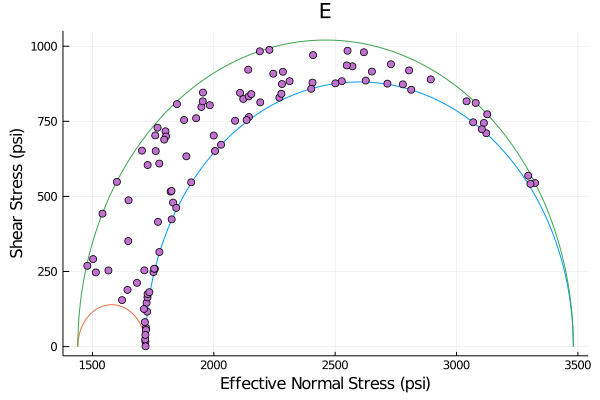

In [131]:
mohrs_circle(effective_e)
scatter!(effective_normal_stress, shear_stress, label = false)

## Problem 1.3 

In [132]:
friction_coefficient_lower_bound = 0.4
friction_coefficient_upper_bound = 0.6
friction_coefficient = 0.5;

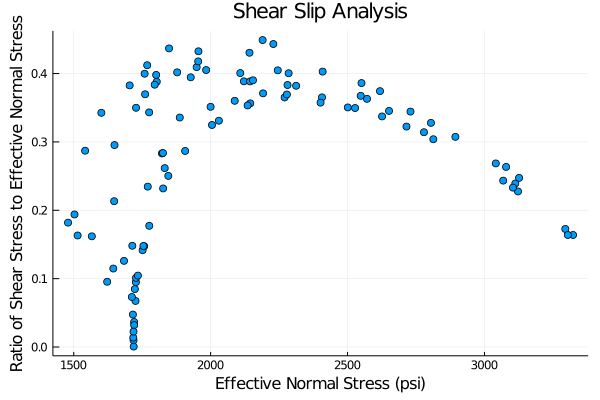

In [133]:
ratio = shear_stress./effective_normal_stress;
scatter(effective_normal_stress, ratio, label = false)
title!("Shear Slip Analysis")
ylabel!("Ratio of Shear Stress to Effective Normal Stress")
xlabel!("Effective Normal Stress (psi)")

Based on the analysis, there are fractures that are likely to slip for the ratio that is above 0.4. These fractures are most likely to be hydraulically conductive. 

## Problem 1.4 

In [134]:
random_variables_problem_4 = 20
set_1_strike = rand(Normal(60,10),random_variables_problem_4)
set_1_dip = rand(Normal(80,5),random_variables_problem_4)
set_2_strike = rand(Normal(10,10),random_variables_problem_4)
set_2_dip = rand(Normal(60,5),random_variables_problem_4);

In [118]:
effective_normal_stress_set_1, shear_stress_set_1 = normal_stress_and_shear_stress_function(random_variables_problem_4, set_1_strike, set_1_dip, geographical_stress_tensor, pore_pressure)
effective_normal_stress_set_2, shear_stress_set_2 = normal_stress_and_shear_stress_function(random_variables_problem_4, set_2_strike, set_2_dip, geographical_stress_tensor, pore_pressure); 

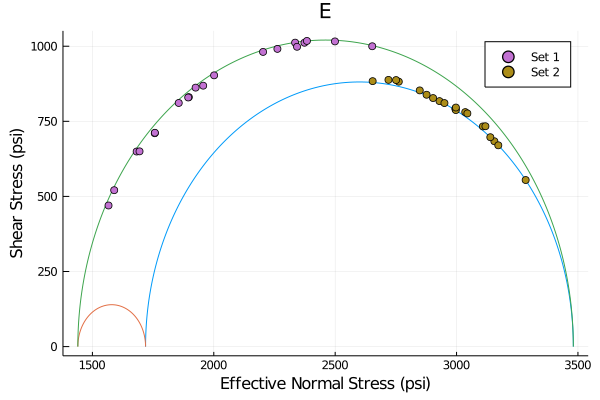

In [119]:
mohrs_circle(effective_e)
scatter!(effective_normal_stress_set_1, shear_stress_set_1, label = "Set 1")
scatter!(effective_normal_stress_set_2, shear_stress_set_2, label = "Set 2")

The above plot shows twenty fractures for each of the two sets that were provided. 

In [120]:
ratio_set_2 = shear_stress_set_2./effective_normal_stress_set_2
ratio_set_1 = shear_stress_set_1./effective_normal_stress_set_1;

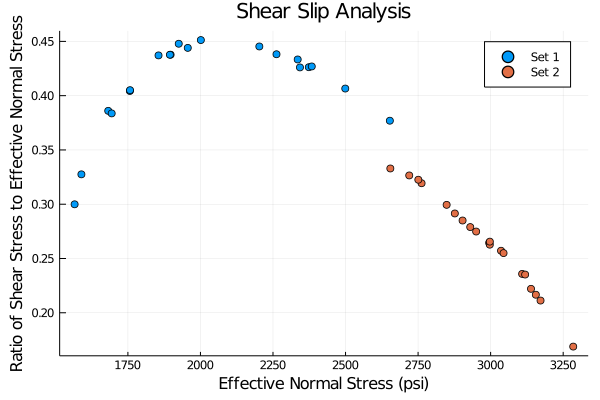

In [121]:
scatter(effective_normal_stress_set_1, ratio_set_1, label = "Set 1")
scatter!(effective_normal_stress_set_2, ratio_set_2, label = "Set 2")
title!("Shear Slip Analysis")
ylabel!("Ratio of Shear Stress to Effective Normal Stress")
xlabel!("Effective Normal Stress (psi)")

Based on the randomly generated data, Set 1 is more likely to slip than Set 2 because a larger proportion of its coefficients exceed a ratio of 0.4. 